In [1]:
!python --version

Python 2.7.13 :: Continuum Analytics, Inc.


In [2]:
!conda env list

# conda environments:
#
GoogEarthEngine          /home/jp/miniconda2/envs/GoogEarthEngine
astroconda               /home/jp/miniconda2/envs/astroconda
everest-pipeline         /home/jp/miniconda2/envs/everest-pipeline
helios                   /home/jp/miniconda2/envs/helios
iraf27                *  /home/jp/miniconda2/envs/iraf27
ircs_pol                 /home/jp/miniconda2/envs/ircs_pol
moscatel                 /home/jp/miniconda2/envs/moscatel
radmc3dpy                /home/jp/miniconda2/envs/radmc3dpy
root                     /home/jp/miniconda2



## skysubtraction (next dither)

In [3]:
import glob
import getpass
import os
try:
    from astropy.io import fits as pf
except:
    import pyfits as pf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

skysub_ch1 = glob.glob('*fgs_ch1.fits')
skysub_ch1.sort()
skysub_ch2 = glob.glob('*fgs_ch2.fits')
skysub_ch2.sort()

In [4]:
nframes = 3
wpangle=4
ndither=5

for i in range(12):
    hdr1 = pf.getheader(skysub_ch1[i])['I_DTHPOS']
    hdr2 = pf.getheader(skysub_ch1[i+nframes*wpangle])['I_DTHPOS']
    #print('{0} - {1}'.format(i,i+nframes))
    print('{0} - {1}'.format(hdr1, hdr2))
for i in range(len(skysub_ch1)-(nframes*wpangle)):
    hdr1 = pf.getheader(skysub_ch1[i+nframes*wpangle])['I_DTHPOS']
    hdr2 = pf.getheader(skysub_ch1[i])['I_DTHPOS']
    #print('{0} - {1}'.format(i+nframes,i))
    print('{0} - {1}'.format(hdr1, hdr2))

1 : WP0 - 2 : WP0
1 : WP0 - 2 : WP0
1 : WP0 - 2 : WP0
1 : WP45 - 2 : WP45
1 : WP45 - 2 : WP45
1 : WP45 - 2 : WP45
1 : WP22.5 - 2 : WP22.5
1 : WP22.5 - 2 : WP22.5
1 : WP22.5 - 2 : WP22.5
1 : WP67.5 - 2 : WP67.5
1 : WP67.5 - 2 : WP67.5
1 : WP67.5 - 2 : WP67.5
2 : WP0 - 1 : WP0
2 : WP0 - 1 : WP0
2 : WP0 - 1 : WP0
2 : WP45 - 1 : WP45
2 : WP45 - 1 : WP45
2 : WP45 - 1 : WP45
2 : WP22.5 - 1 : WP22.5
2 : WP22.5 - 1 : WP22.5
2 : WP22.5 - 1 : WP22.5
2 : WP67.5 - 1 : WP67.5
2 : WP67.5 - 1 : WP67.5
2 : WP67.5 - 1 : WP67.5
3 : WP0 - 2 : WP0
3 : WP0 - 2 : WP0
3 : WP0 - 2 : WP0
3 : WP45 - 2 : WP45
3 : WP45 - 2 : WP45
3 : WP45 - 2 : WP45
3 : WP22.5 - 2 : WP22.5
3 : WP22.5 - 2 : WP22.5
3 : WP22.5 - 2 : WP22.5
3 : WP67.5 - 2 : WP67.5
3 : WP67.5 - 2 : WP67.5
3 : WP67.5 - 2 : WP67.5
4 : WP0 - 3 : WP0
4 : WP0 - 3 : WP0
4 : WP0 - 3 : WP0
4 : WP45 - 3 : WP45
4 : WP45 - 3 : WP45
4 : WP45 - 3 : WP45
4 : WP22.5 - 3 : WP22.5
4 : WP22.5 - 3 : WP22.5
4 : WP22.5 - 3 : WP22.5
4 : WP67.5 - 3 : WP67.5
4 : WP67.5 - 3 :

In [5]:
len(skysub_ch1)

60

In [6]:
len(skysub_ch2)

60

## Check frames

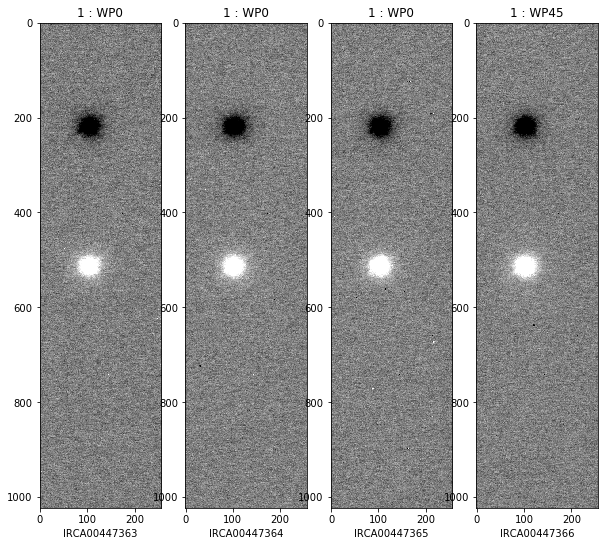

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.visualization import ZScaleInterval
interval= ZScaleInterval()

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,20))
for idx,i in enumerate(skysub_ch1[:4]):
    img = pf.getdata(i)
    hdr = pf.getheader(i)
    vmin, vmax = interval.get_limits(img)
    ax[idx].imshow(img, vmin=vmin, vmax=vmax, cmap='gray')
    ax[idx].set_title(hdr['I_DTHPOS'])
    ax[idx].set_xlabel(hdr['FRAMEID'])

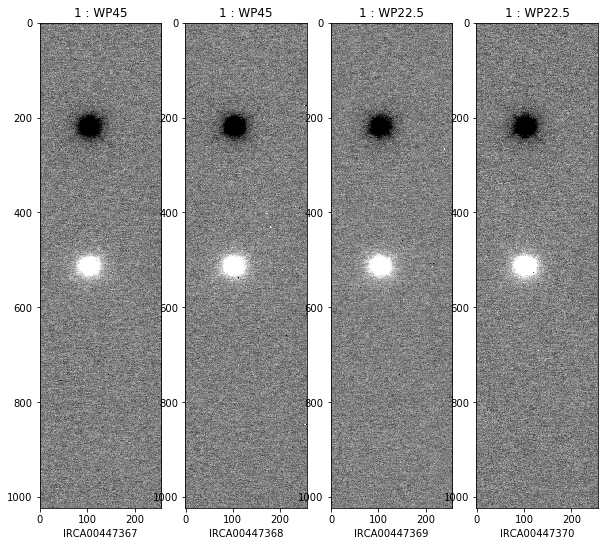

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,20))
for idx,i in enumerate(skysub_ch1[4:8]):
    img = pf.getdata(i)
    hdr = pf.getheader(i)
    vmin, vmax = interval.get_limits(img)
    ax[idx].imshow(img, vmin=vmin, vmax=vmax, cmap='gray')
    ax[idx].set_title(hdr['I_DTHPOS'])
    ax[idx].set_xlabel(hdr['FRAMEID'])

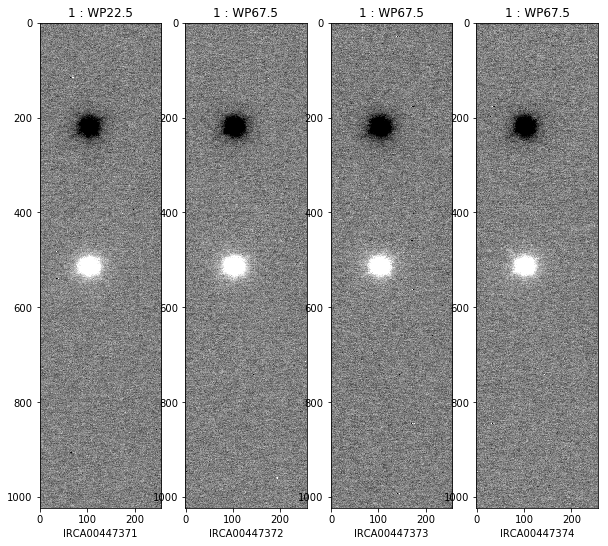

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,20))
for idx,i in enumerate(skysub_ch1[8:12]):
    img = pf.getdata(i)
    hdr = pf.getheader(i)
    vmin, vmax = interval.get_limits(img)
    ax[idx].imshow(img, vmin=vmin, vmax=vmax, cmap='gray')
    ax[idx].set_title(hdr['I_DTHPOS'])
    ax[idx].set_xlabel(hdr['FRAMEID'])

In [10]:
#load all images into dict
img_ch1 = {}
img_ch2 = {}

for idx,i in enumerate(skysub_ch1):
    hdr = pf.getheader(i)['I_DTHPOS']
    img = pf.getdata(i)
    img_ch1[hdr] = img
    
for idx,j in enumerate(skysub_ch2):
    hdr = pf.getheader(j)['I_DTHPOS']
    img = pf.getdata(j)
    print(hdr)
    img_ch2[hdr] = img

1 : WP0
1 : WP0
1 : WP0
1 : WP45
1 : WP45
1 : WP45
1 : WP22.5
1 : WP22.5
1 : WP22.5
1 : WP67.5
1 : WP67.5
1 : WP67.5
2 : WP0
2 : WP0
2 : WP0
2 : WP45
2 : WP45
2 : WP45
2 : WP22.5
2 : WP22.5
2 : WP22.5
2 : WP67.5
2 : WP67.5
2 : WP67.5
3 : WP0
3 : WP0
3 : WP0
3 : WP45
3 : WP45
3 : WP45
3 : WP22.5
3 : WP22.5
3 : WP22.5
3 : WP67.5
3 : WP67.5
3 : WP67.5
4 : WP0
4 : WP0
4 : WP0
4 : WP45
4 : WP45
4 : WP45
4 : WP22.5
4 : WP22.5
4 : WP22.5
4 : WP67.5
4 : WP67.5
4 : WP67.5
5 : WP0
5 : WP0
5 : WP0
5 : WP45
5 : WP45
5 : WP45
5 : WP22.5
5 : WP22.5
5 : WP22.5
5 : WP67.5
5 : WP67.5
5 : WP67.5


## 3 waveplate rotation sets

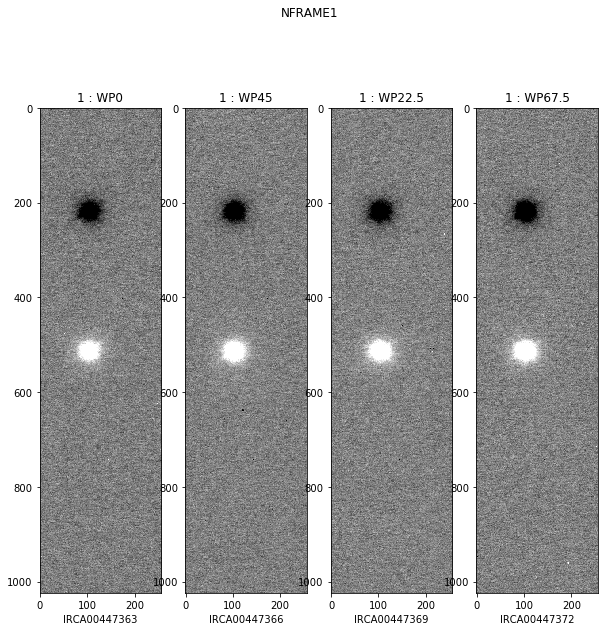

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,10))
idx=0
for i in skysub_ch1[:12][::3]:
    hdr = pf.getheader(i)
    img = pf.getdata(i)
    vmin, vmax = interval.get_limits(img)
    ax[idx].imshow(img, vmin=vmin, vmax=vmax, cmap='gray')
    plt.suptitle('NFRAME1')
    if isinstance(hdr['I_DTHPOS'], str): 
        ax[idx].set_title(hdr['I_DTHPOS'])
        ax[idx].set_xlabel(hdr['FRAMEID'])
    else:
        pass
    idx+=1

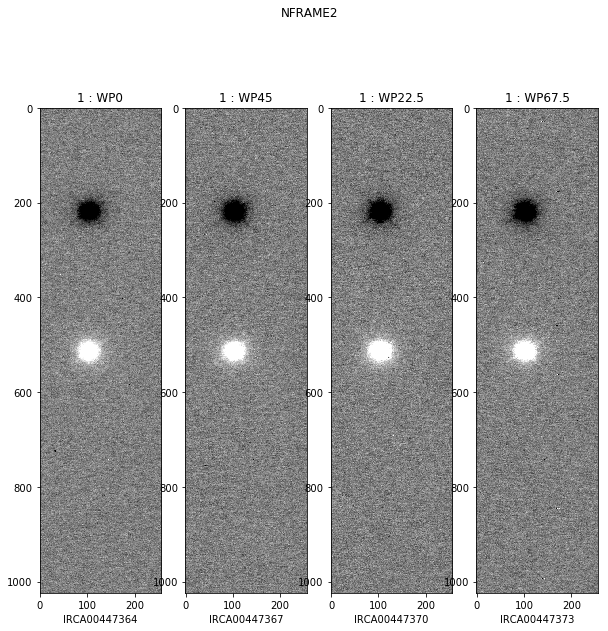

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,10))
idx=0
for i in range(12)[::3]:
    hdr = pf.getheader(skysub_ch1[i+1])
    img = pf.getdata(skysub_ch1[i+1])
    vmin, vmax = interval.get_limits(img)
    ax[idx].imshow(img, vmin=vmin, vmax=vmax, cmap='gray')
    plt.suptitle('NFRAME2')
    if isinstance(hdr['I_DTHPOS'], str): 
        ax[idx].set_title(hdr['I_DTHPOS'])
        ax[idx].set_xlabel(hdr['FRAMEID'])
    else:
        pass
    idx+=1

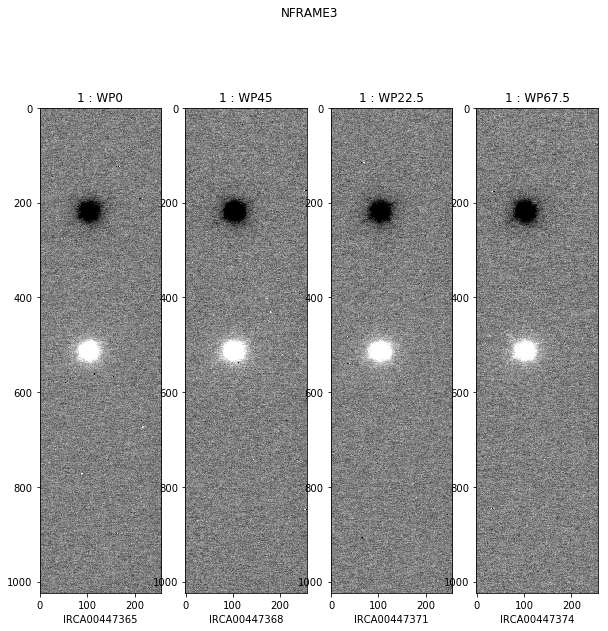

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,10))
idx=0
for i in range(12)[::3]:
    hdr = pf.getheader(skysub_ch1[i+2])
    img = pf.getdata(skysub_ch1[i+2])
    vmin, vmax = interval.get_limits(img)
    ax[idx].imshow(img, vmin=vmin, vmax=vmax, cmap='gray')
    plt.suptitle('NFRAME3')
    if isinstance(hdr['I_DTHPOS'], str): 
        ax[idx].set_title(hdr['I_DTHPOS'])
        ax[idx].set_xlabel(hdr['FRAMEID'])
    else:
        pass
    idx+=1

## combine I images (dither 1)

In [14]:
I = {}

for i in range(len(skysub_ch1)):
    hdr = pf.getheader(skysub_ch1[i])['I_DTHPOS']
    img1 = pf.getdata(skysub_ch1[i])
    img2 = pf.getdata(skysub_ch2[i])
    I[i] = img1 + img2
    print(hdr)

1 : WP0
1 : WP0
1 : WP0
1 : WP45
1 : WP45
1 : WP45
1 : WP22.5
1 : WP22.5
1 : WP22.5
1 : WP67.5
1 : WP67.5
1 : WP67.5
2 : WP0
2 : WP0
2 : WP0
2 : WP45
2 : WP45
2 : WP45
2 : WP22.5
2 : WP22.5
2 : WP22.5
2 : WP67.5
2 : WP67.5
2 : WP67.5
3 : WP0
3 : WP0
3 : WP0
3 : WP45
3 : WP45
3 : WP45
3 : WP22.5
3 : WP22.5
3 : WP22.5
3 : WP67.5
3 : WP67.5
3 : WP67.5
4 : WP0
4 : WP0
4 : WP0
4 : WP45
4 : WP45
4 : WP45
4 : WP22.5
4 : WP22.5
4 : WP22.5
4 : WP67.5
4 : WP67.5
4 : WP67.5
5 : WP0
5 : WP0
5 : WP0
5 : WP45
5 : WP45
5 : WP45
5 : WP22.5
5 : WP22.5
5 : WP22.5
5 : WP67.5
5 : WP67.5
5 : WP67.5


In [13]:
#nframe1
for i in range(len(skysub_ch1))[::3]:
    hdr = pf.getheader(skysub_ch1[i])['I_DTHPOS']
    print(hdr)

1 : WP0
1 : WP45
1 : WP22.5
1 : WP67.5
2 : WP0
2 : WP45
2 : WP22.5
2 : WP67.5
3 : WP0
3 : WP45
3 : WP22.5
3 : WP67.5
4 : WP0
4 : WP45
4 : WP22.5
4 : WP67.5
5 : WP0
5 : WP45
5 : WP22.5
5 : WP67.5


In [14]:
#nframe2
for i in range(len(skysub_ch1))[::3]:
    hdr = pf.getheader(skysub_ch1[i+1])['I_DTHPOS']
    print(hdr)

1 : WP0
1 : WP45
1 : WP22.5
1 : WP67.5
2 : WP0
2 : WP45
2 : WP22.5
2 : WP67.5
3 : WP0
3 : WP45
3 : WP22.5
3 : WP67.5
4 : WP0
4 : WP45
4 : WP22.5
4 : WP67.5
5 : WP0
5 : WP45
5 : WP22.5
5 : WP67.5


In [15]:
#nframe3
for i in range(len(skysub_ch1))[::3]:
    hdr = pf.getheader(skysub_ch1[i+2])['I_DTHPOS']
    print(hdr)

1 : WP0
1 : WP45
1 : WP22.5
1 : WP67.5
2 : WP0
2 : WP45
2 : WP22.5
2 : WP67.5
3 : WP0
3 : WP45
3 : WP22.5
3 : WP67.5
4 : WP0
4 : WP45
4 : WP22.5
4 : WP67.5
5 : WP0
5 : WP45
5 : WP22.5
5 : WP67.5


In [23]:
#I.keys()

In [16]:
I1 = {}
I2 = {}
I3 = {}

m=0
for i in range(len(skysub_ch1))[::3]:
    hdr1 = pf.getheader(skysub_ch1[i])['I_DTHPOS']
    img1 = pf.getdata(skysub_ch1[i])
    img2 = pf.getdata(skysub_ch2[i])
    I1[m] = img1 + img2
    m+=1

n=0
for i in range(len(skysub_ch1))[::3]:
    hdr2 = pf.getheader(skysub_ch1[i+1])['I_DTHPOS']
    img1 = pf.getdata(skysub_ch1[i+1])
    img2 = pf.getdata(skysub_ch2[i+1])
    I2[n] = img1 + img2
    n+=1
    
o=0
for i in range(len(skysub_ch1))[::3]:
    hdr1 = pf.getheader(skysub_ch1[i+2])['I_DTHPOS']
    img1 = pf.getdata(skysub_ch1[i+2])
    img2 = pf.getdata(skysub_ch2[i+2])
    I3[o] = img1 + img2
    o+=1

In [23]:
I1.keys()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [17]:
Q1 = {}
Q2 = {}
Q3 = {}
U1 = {}
U2 = {}
U3 = {}
for i in range(len(I1))[::3]:
    Q1[i]=I1[i]-I1[i+1]
    U1[i]=I1[i+2]-I1[i+3]
    
for j in range(len(I2))[::3]:
    Q2[j]=I2[j]-I2[j+1]
    U2[j]=I2[j+2]-I2[j+3]
    
for k in range(len(I3))[::3]:
    Q3[k]=I3[k]-I3[k+1]
    U3[k]=I3[k+2]-I3[k+3]

KeyError: 20

In [18]:
len(Q1)

16

In [19]:
PI1={}
PI2={}
PI3={}

for i,q in enumerate(Q1.keys()):
    PI1[i]=np.sqrt(Q1[q]**2+U1[q]**2)
    PI2[i]=np.sqrt(Q2[q]**2+U2[q]**2)
    PI3[i]=np.sqrt(Q3[q]**2+U3[q]**2)

In [20]:
len(PI1)

16

## Q

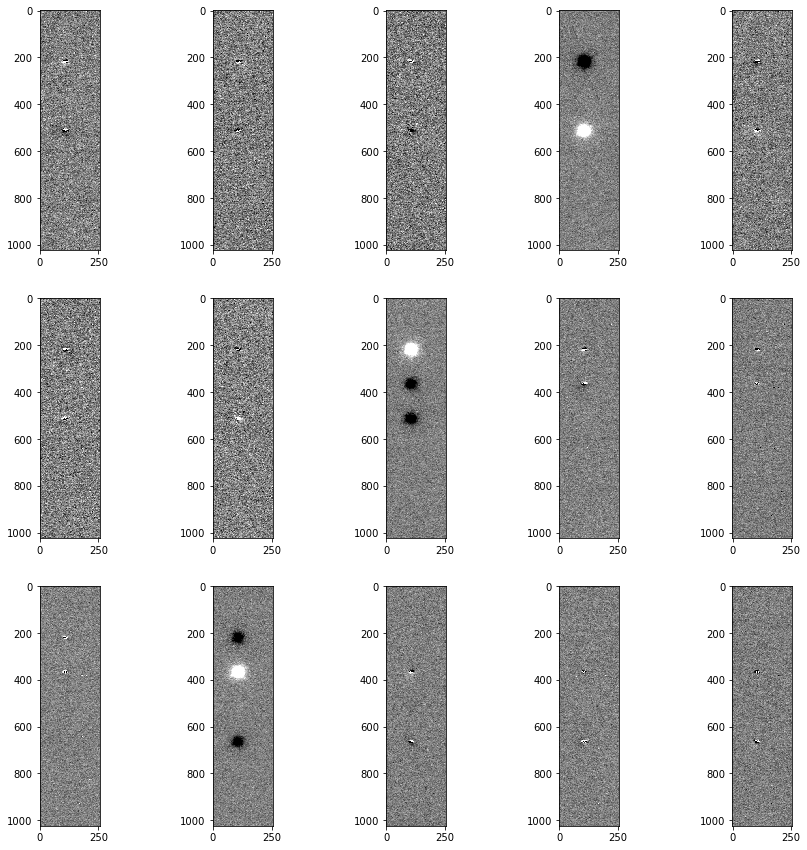

In [21]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(15,15))

for n in range(5):
    vmin1, vmax1 = interval.get_limits(Q1[n])
    vmin2, vmax2 = interval.get_limits(Q1[n+5])
    vmin3, vmax3 = interval.get_limits(Q1[n+10])
    ax[0,n].imshow(Q1[n], vmin=vmin1, vmax=vmax1, cmap='gray')
    ax[1,n].imshow(Q1[n+5], vmin=vmin2, vmax=vmax2, cmap='gray')
    ax[2,n].imshow(Q1[n+10], vmin=vmin3, vmax=vmax3, cmap='gray')

## U

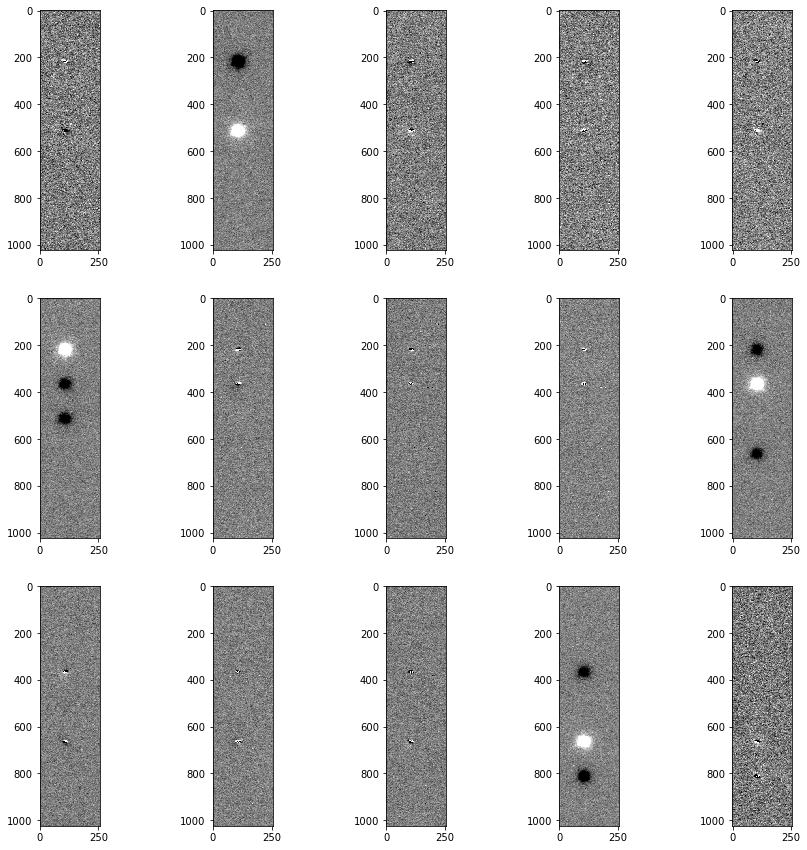

In [100]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(15,15))

for n in range(5):
    vmin1, vmax1 = interval.get_limits(U1[n])
    vmin2, vmax2 = interval.get_limits(U1[n+5])
    vmin3, vmax3 = interval.get_limits(U1[n+10])
    ax[0,n].imshow(U1[n], vmin=vmin1, vmax=vmax1, cmap='gray')
    ax[1,n].imshow(U1[n+5], vmin=vmin2, vmax=vmax2, cmap='gray')
    ax[2,n].imshow(U1[n+10], vmin=vmin3, vmax=vmax3, cmap='gray')

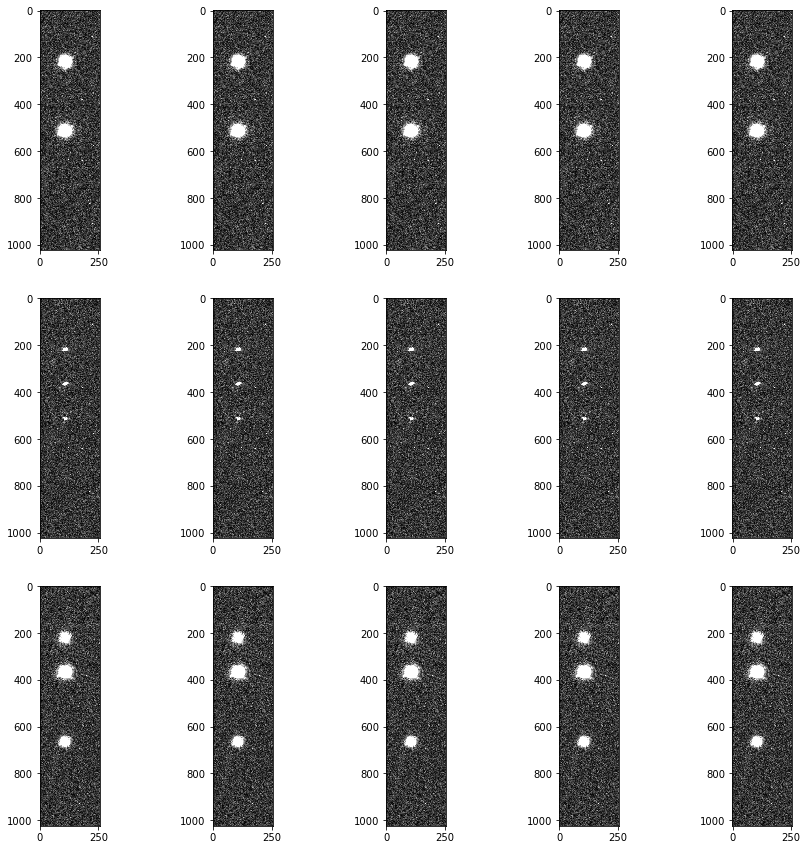

In [47]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(15,15))

for i in range(5):
    vmin, vmax = interval.get_limits(PI1[n])
    ax[0,i].imshow(PI1[n], vmin=vmin, vmax=vmax, cmap='gray')
    ax[1,i].imshow(PI1[n+5], vmin=vmin, vmax=vmax, cmap='gray')
    ax[2,i].imshow(PI1[n+10], vmin=vmin, vmax=vmax, cmap='gray')

## median combined I, Q, U, PI (dither=1)

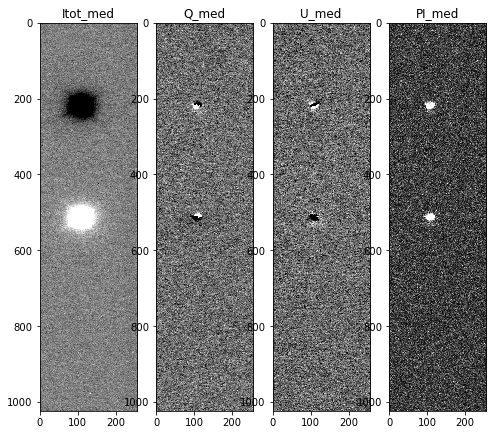

In [296]:
U_med = np.median(U_set, axis=0)
Q_med = np.median(Q_set, axis=0)
Itot_med = np.median(Itot_set, axis=0)
PI_med = np.sqrt(Q_med**2+U_med**2)

vmin1, vmax1 = interval.get_limits(Itot_med)
vmin2, vmax2 = interval.get_limits(Q_med)
vmin3, vmax3 = interval.get_limits(U_med)
vmin4, vmax4 = interval.get_limits(PI_med)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(8,20))

ax[0].imshow(Itot_med, vmin=vmin1, vmax=vmax1, cmap='gray')
ax[0].set_title('Itot_med')
ax[1].imshow(Q_med, vmin=vmin2, vmax=vmax2, cmap='gray')
ax[1].set_title('Q_med')
ax[2].imshow(U_med, vmin=vmin3, vmax=vmax3, cmap='gray')
ax[2].set_title('U_med')
ax[3].imshow(PI_med, vmin=vmin4, vmax=vmax4, cmap='gray')
ax[3].set_title('PI_med')

## Combine all